In [2]:
%load_ext autoreload
%autoreload 2

%config Completer.use_jedi = False

import os, numpy as np, pickle, pandas as pd, tqdm, time, scipy
from astropy.coordinates import SkyCoord

## Source

In [2]:
ra, dec = 10, 10; G=16
coord = SkyCoord(ra, dec, unit='deg', frame='icrs')

In [3]:
# Astrometry - deg, deg, mas, mas/y, mas/y
r5d = np.array([ra, dec, 12., 20., 20.])

# Query Scanning law
- Replace with scanning law repository

In [8]:
import scanninglaw.times as sl
from scanninglaw.source import Source

from scanninglaw.config import config
config['data_dir'] = '/data/asfe2/Projects/testscanninglaw/'

In [9]:
dr2_sl = sl.dr2_sl(version='cog')

Loading auxilliary data ...
t = 24.282 s
  auxilliary:  13.058 s
          sf:   3.666 s
interpolator:   7.557 s


In [10]:
c = Source(coord, photometry={'gaia_g':G})
scan_law = dr2_sl(c, return_times=True, return_angles=True)

In [11]:
nObs=100
# Time in jyear
times = np.sort(2016+(34/12)*(-0.5+np.random.rand(nObs)))
# Scan angles in degrees
angles = 360*np.random.rand(nObs)

# Fit astrometry

In [14]:
import fit

In [12]:
sigma_al_data = np.genfromtxt('data/scatteral_edr3.csv',skip_header=1,delimiter=',',unpack=True)
mags=sigma_al_data[0]
sigma_als=sigma_al_data[1]

[ 2.15  2.35  2.45  2.55  2.65  2.75  2.95  3.05  3.25  3.45  3.55  3.65
  3.75  3.85  3.95  4.05  4.15  4.25  4.35  4.45  4.55  4.65  4.75  4.85
  4.95  5.05  5.15  5.25  5.35  5.45  5.55  5.65  5.75  5.85  5.95  6.05
  6.15  6.25  6.35  6.45  6.55  6.65  6.75  6.85  6.95  7.05  7.15  7.25
  7.35  7.45  7.55  7.65  7.75  7.85  7.95  8.05  8.15  8.25  8.35  8.45
  8.55  8.65  8.75  8.85  8.95  9.05  9.15  9.25  9.35  9.45  9.55  9.65
  9.75  9.85  9.95 10.05 10.15 10.25 10.35 10.45 10.55 10.65 10.75 10.85
 10.95 11.05 11.15 11.25 11.35 11.45 11.55 11.65 11.75 11.85 11.95 12.05
 12.15 12.25 12.35 12.45 12.55 12.65 12.75 12.85 12.95 13.05 13.15 13.25
 13.35 13.45 13.55 13.65 13.75 13.85 13.95 14.05 14.15 14.25 14.35 14.45
 14.55 14.65 14.75 14.85 14.95 15.05 15.15 15.25 15.35 15.45 15.55 15.65
 15.75 15.85 15.95 16.05 16.15 16.25 16.35 16.45 16.55 16.65 16.75 16.85
 16.95 17.05 17.15 17.25 17.35 17.45 17.55 17.65 17.75 17.85 17.95 18.05
 18.15 18.25 18.35 18.45 18.55 18.65 18.75 18.85 18

In [33]:
# Individual measurement error
sigma_al = np.array(pd.read_csv('data/scatteral_edr3.csv', usecols=['magbin','var_al_50']))
sigma_al_interp = scipy.interpolate.interp1d(sigma_al[:,0], sigma_al[:,1], bounds_error=False)

x_err = np.zeros(len(times)) + sigma_al_interp(c.photometry.measurement['gaia_g'])

In [34]:
gaia = fit.agis(r5d.copy(), times, angles, x_err)
gaia

{'astrometric_matched_transits': 100,
 'visibility_periods_used': 74,
 'astrometric_n_obs_al': 900,
 'astrometric_params_solved': 31,
 'ra': 10.000000000526613,
 'ra_error': 0.006402252688189413,
 'dec': 9.99999999968274,
 'dec_error': 0.0062856106260303895,
 'ra_dec_corr': 0.05038750925651077,
 'parallax': 11.995523392176983,
 'parallax_error': 0.009118785689358498,
 'ra_parallax_corr': -0.17862340671316596,
 'dec_parallax_corr': -0.016140391739374812,
 'pmra': 20.01362368207996,
 'pmra_error': 0.008365073303560821,
 'ra_pmra_corr': -0.06412241591607752,
 'dec_pmra_corr': -0.038465747016938015,
 'parallax_pmra_corr': 0.027226686760295365,
 'pmdec': 19.996199198879648,
 'pmdec_error': 0.007958008594419263,
 'ra_pmdec_corr': -0.03160034182249754,
 'dec_pmdec_corr': -0.020107524622711107,
 'parallax_pmdec_corr': -0.0486083915738508,
 'pmra_pmdec_corr': 0.1595422081522804,
 'astrometric_excess_noise': 0.0,
 'astrometric_chi2_al': 807.0647593463407,
 'astrometric_n_good_obs_al': 900,
 'UWE

xerr shape:  (900,)


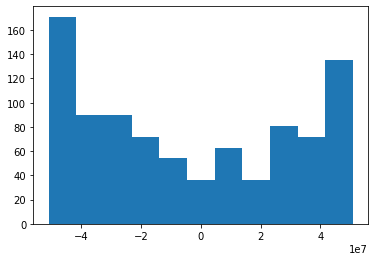

x_obs:  [-34148776.39596474 -34148776.39596474 -34148776.39596474
 -34148776.39596474 -34148776.39596474 -34148776.39596474
 -34148776.39596474 -34148776.39596474 -34148776.39596474
  40154941.96281061  40154941.96281061  40154941.96281061
  40154941.96281061  40154941.96281061  40154941.96281061
  40154941.96281061  40154941.96281061  40154941.96281061
  44279655.75390596  44279655.75390596  44279655.75390596
  44279655.75390596  44279655.75390596  44279655.75390596
  44279655.75390596  44279655.75390596  44279655.75390596
  38561403.4890983   38561403.4890983   38561403.4890983
  38561403.4890983   38561403.4890983   38561403.4890983
  38561403.4890983   38561403.4890983   38561403.4890983
  36561706.09687367  36561706.09687367  36561706.09687367
  36561706.09687367  36561706.09687367  36561706.09687367
  36561706.09687367  36561706.09687367  36561706.09687367
  38010740.37967018  38010740.37967018  38010740.37967018
  38010740.37967018  38010740.37967018  38010740.37967018
  3801074

{'astrometric_matched_transits': 100,
 'visibility_periods_used': 70,
 'astrometric_n_obs_al': 900,
 'astrometric_params_solved': 31,
 'ra': 9.99999999805405,
 'ra_error': 0.014790720567951925,
 'dec': 10.000000005973956,
 'dec_error': 0.014019950513444393,
 'ra_dec_corr': 0.02381477979402355,
 'parallax': 12.026366267331468,
 'parallax_error': 0.02145173006086704,
 'ra_parallax_corr': -0.03087213888638879,
 'dec_parallax_corr': 0.09163098432273893,
 'pmra': 19.97273317013969,
 'pmra_error': 0.017828542713460696,
 'ra_pmra_corr': 0.01603357735785749,
 'dec_pmra_corr': -0.06336621177763972,
 'parallax_pmra_corr': 0.05493772002019771,
 'pmdec': 20.007959291804582,
 'pmdec_error': 0.017788062452610533,
 'ra_pmdec_corr': -0.0697165628858692,
 'dec_pmdec_corr': 0.13804936987696817,
 'parallax_pmdec_corr': 0.01403414880856309,
 'pmra_pmdec_corr': -0.0013938085586097351,
 'astrometric_excess_noise': 0.0,
 'astrometric_chi2_al': 966.5166143039851,
 'astrometric_n_good_obs_al': 900,
 'UWE': 1.0

In [29]:
gaia = astromet.agis(r5d.copy(), times, angles, x_err)
gaia

# Add some extra noise

In [11]:
# Add 5mas excess noise
def excess(t, e=5):
    noise = np.random.normal(0,e,size=(2,len(t)))
    return noise

In [12]:
gaia = agis.agis(r5d.copy(), times, angles, x_err, extra=excess)
gaia, np.sqrt(gaia['astrometric_chi2_al']/(gaia['astrometric_n_good_obs_al']-5))

({'astrometric_chi2_al': 104872.42383631156,
  'astrometric_excess_noise': 4.838866117576092,
  'astrometric_matched_transits': 40,
  'astrometric_n_good_obs_al': 360,
  'astrometric_n_obs_al': 360,
  'astrometric_params_solved': 31,
  'dec': 0.0,
  'dec_error': 0.16973054120561698,
  'dec_parallax_corr': -0.02218017883361017,
  'dec_pmdec_corr': 0.3856304905979747,
  'dec_pmra_corr': -0.18625291316207968,
  'parallax': 12.152146009063118,
  'parallax_error': 0.3678232650834633,
  'parallax_pmdec_corr': -0.36350610777167136,
  'parallax_pmra_corr': 0.0813780448207605,
  'pmdec': 20.61383129404194,
  'pmdec_error': 0.3452118955595791,
  'pmra': 22.1064360446678,
  'pmra_error': 0.697264562721575,
  'pmra_pmdec_corr': 0.2533759812789544,
  'ra': 0.0,
  'ra_dec_corr': 0.29757032836257474,
  'ra_error': 0.32045830254362045,
  'ra_parallax_corr': 0.3628512370636997,
  'ra_pmdec_corr': -0.23378258994003226,
  'ra_pmra_corr': -0.04596540606648901,
  'visibility_periods_used': 11},
 17.1876490

### astrometric_excess_noise is of order the extra noise we've added!

# Reproduce plot from ASF paper

In [13]:
# Plotting modules
import matplotlib
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('legend',fontsize=16)
plt.rc('font',size=16)

In [15]:
scan_order = np.argsort(times)

coords = ['ra','dec','parallax','pmra','pmdec']
var = np.zeros((5, len(scan_order)))
visibility_periods = np.zeros(len(scan_order))
for ii in range(1,len(scan_order)):
    gaia = agis.agis(r5d.copy(), times[scan_order][:ii], angles[scan_order][:ii], x_err[scan_order][:ii], G=16)
    var[:,ii] = np.array([gaia[coords[j]+'_error']**2 for j in range(5)])
    visibility_periods[ii]=gaia['visibility_periods_used']
var[:,0]=1e10

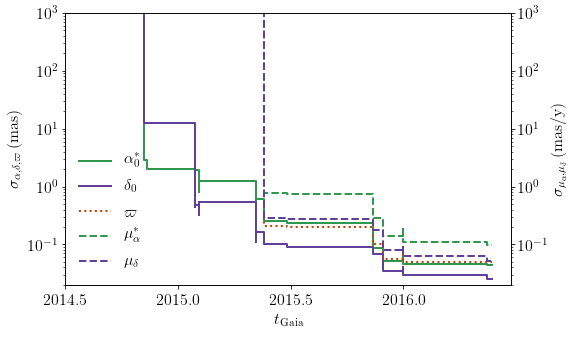

In [16]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

# Gaia DR2 time range
tlimits = 2015.0 + (agis.get_gaiat(np.array([1192.13, 3750.56])) + 2455197.5 - 2457023.5 - 0.25)/365.

x = np.repeat(times, 2); x=np.insert(x, (0,len(x)), tlimits)
labels=[r'$\alpha_0^*$', r'$\delta_0$', r'$\varpi$', r'$\mu_\alpha^*$', r'$\mu_\delta$']
linestyles=['-','-',':','--','--']
colours=[cm.Greens(0.7), cm.Purples(0.8), cm.Oranges(0.8), cm.Greens(0.7), cm.Purples(0.8)]

for ii in range(5):
    if ii<2: 
        x = np.repeat(times[scan_order], 2); x=np.insert(x, (0,len(x)), tlimits)
        y = np.abs(np.repeat(var[ii], 2))#*(3600*1000)**2
    else: 
        x = np.repeat(times[scan_order][visibility_periods>5], 2); x=np.insert(x, (0,len(x)), tlimits)
        y = np.abs(np.repeat(var[ii][visibility_periods>5], 2))
    y = np.insert(y, (0,0), (1e10,1e10))
    plt.plot(x, np.sqrt(y), label=labels[ii], linestyle=linestyles[ii], color=colours[ii], linewidth=2)
    
    
plt.xticks([2014.5, 2015.0, 2015.5, 2016.0])

plt.xlabel(r'$t_\mathrm{Gaia}$'); plt.legend(loc='lower left', ncol=1, frameon=False)

plt.ylabel(r'$\sigma_{\alpha,\delta,\varpi}\, \mathrm{(mas)}$')
plt.ylim(2e-2, 1e3); plt.yscale('log')
ax2 = ax.twinx()
plt.ylabel(r'$\sigma_{\mu_\alpha,\mu_\delta}\, \mathrm{(mas/y)}$')
plt.ylim(2e-2, 1e3); plt.yscale('log')    